In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import Functions as f

In [57]:
data = pd.read_csv('data/microchips.csv').to_numpy()
np.random.shuffle(data)
X_train, y_train = data[:, :2], data[:, 2]
x1 = X_train[:, 0]
x2 = X_train[:, 1]

1. Use Logistic regression and mapFeatures from the previous exercise to construct nine
different classifiers, one for each of the degrees d 2 [1; 9], and produce a figure containing a
3x3 pattern of subplots showing the corresponding decision boundaries. Make sure that
you pass the argument C=10000.


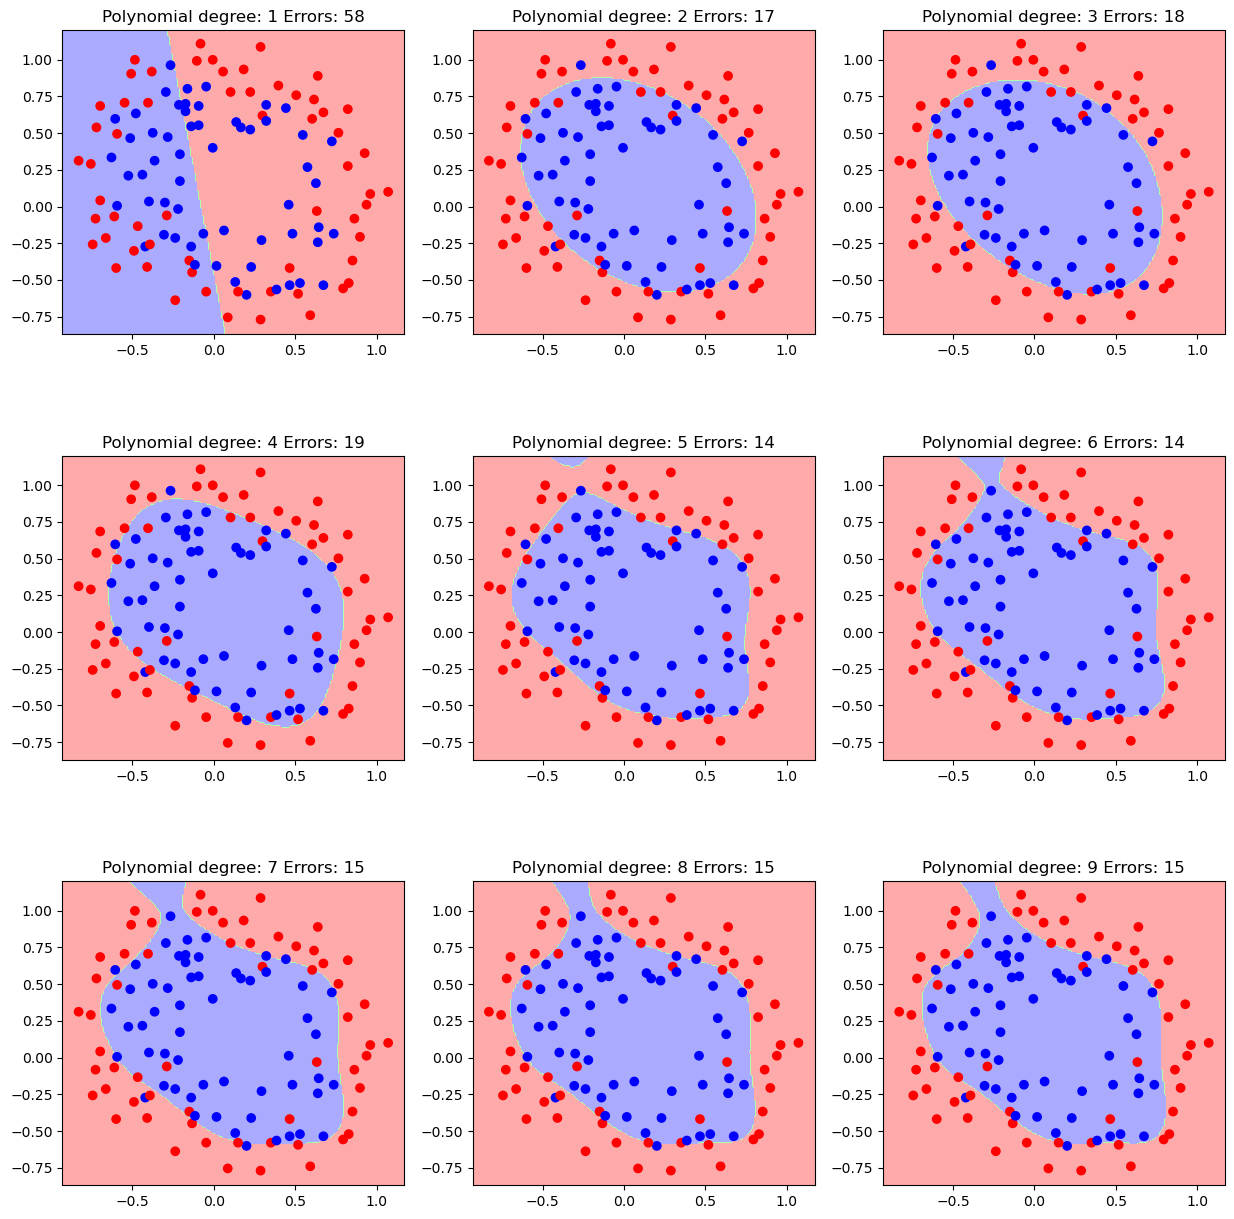

In [58]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .01
x_min, x_max = x1.min() - 0.1, x1.max() + 0.1
y_min, y_max = x2.min() - 0.1, x2.max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x1_mesh, x2_mesh = xx.ravel(), yy.ravel()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for i in range(len(axes)):
    Xe = f.mapFeature(x1, x2, i+1, ones=False)
    logReg = LogisticRegression(solver='lbfgs', C=10000, tol=1e-6, max_iter=10000)
    logReg.fit(Xe, y_train)
    y_pred = logReg.predict(Xe)
    Xe_mesh = f.mapFeature(x1_mesh, x2_mesh, i+1, ones=False)
    errors = np.sum(y_pred != y_train)
    Z = logReg.predict(Xe_mesh)
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cmap_light)
    axes[i].scatter(x1, x2, c=y_train, cmap=cmap_bold)
    axes[i].set_title('Polynomial degree: ' + str(i+1) + ' Errors: ' + str(errors))


2. Redo 1) but now use the regularization parameter C = 1. What is different than from the
step in 1)?


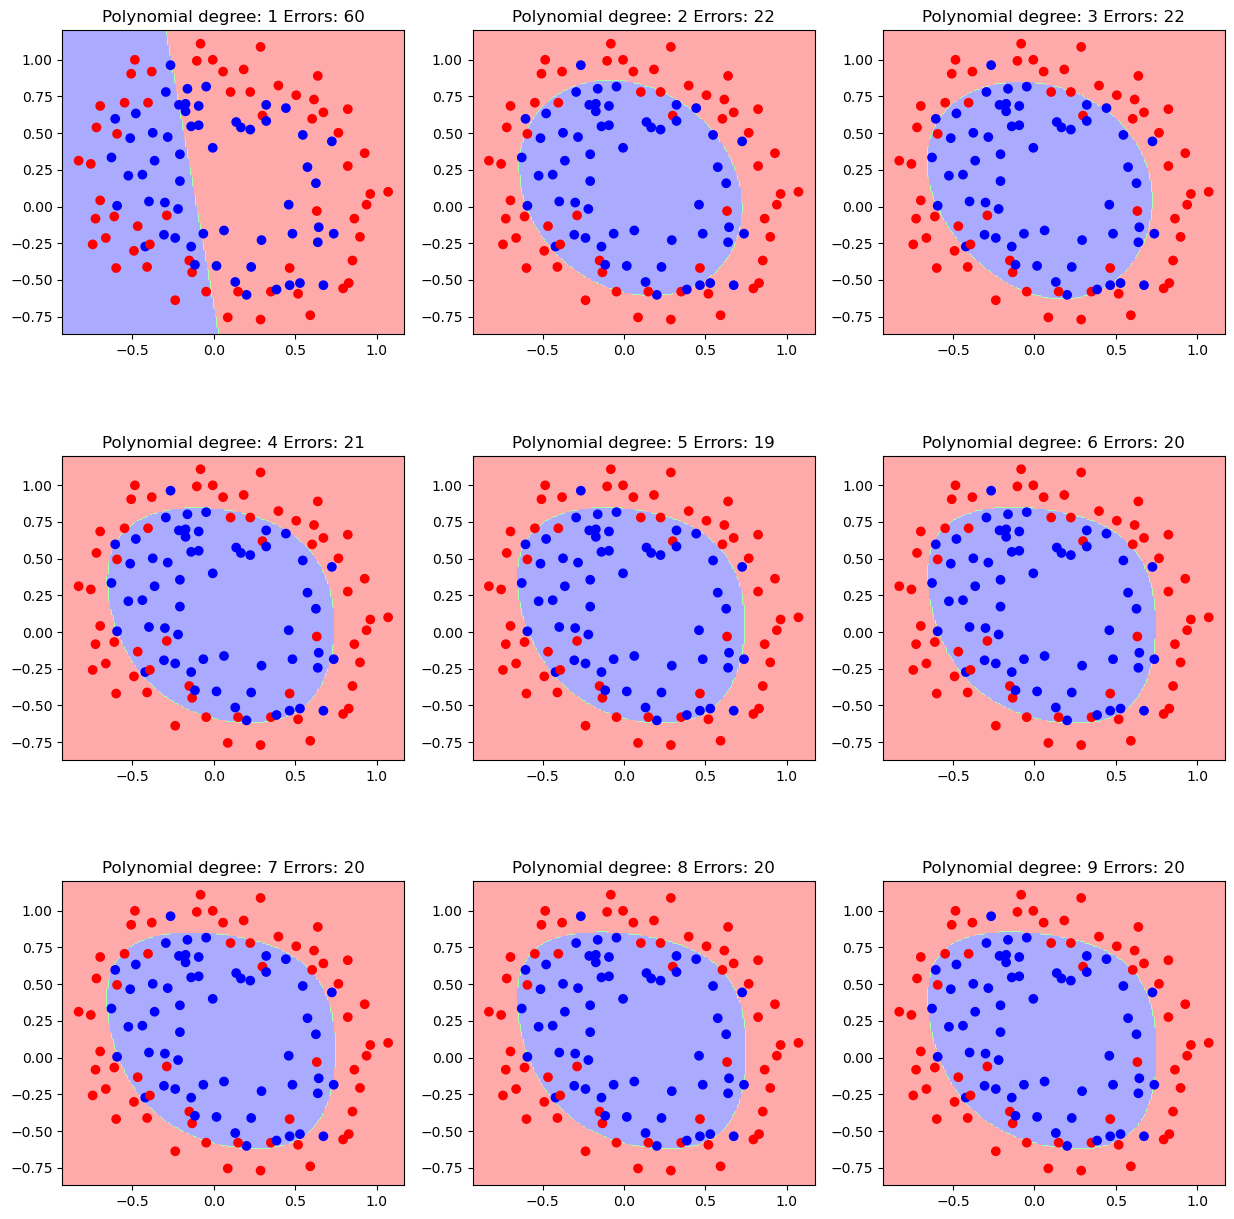

In [59]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .01
x_min, x_max = x1.min() - 0.1, x1.max() + 0.1
y_min, y_max = x2.min() - 0.1, x2.max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x1_mesh, x2_mesh = xx.ravel(), yy.ravel()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for i in range(len(axes)):
    Xe = f.mapFeature(x1, x2, i+1, ones=False)
    logReg = LogisticRegression(solver='lbfgs', C=1, tol=1e-6, max_iter=10000)
    logReg.fit(Xe, y_train)
    y_pred = logReg.predict(Xe)
    Xe_mesh = f.mapFeature(x1_mesh, x2_mesh, i+1, ones=False)
    errors = np.sum(y_pred != y_train)
    Z = logReg.predict(Xe_mesh)
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cmap_light)
    axes[i].scatter(x1, x2, c=y_train, cmap=cmap_bold)
    axes[i].set_title('Polynomial degree: ' + str(i+1) + ' Errors: ' + str(errors))